In [1]:
# Логистическая регрессия датасета "Iris"

In [12]:
# импортируем модули для работы
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pylab
import pylab as plt

In [22]:
iris = datasets.load_iris()
data = pd.DataFrame(iris['data'])
data['Class'] = iris.target
data.columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class']
data.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [32]:
class LogRegression:
    def __init__(self, lr=0.01, n_iter=100):
        self.lr = lr
        self.n_iter = n_iter
        
    def fit(self, X, y):
        X = np.hstack([np.ones((len(X), 1)), X])
        self.theta = np.zeros(X.shape[1])
        for i in range(self.n_iter):
            z = X @ self.theta
            p =  1 / (1 + np.exp(-z))
            gradient = (X.T @ (p - y)) / len(y)
            self.theta -= self.lr * gradient

        
    def predict(self, X):
        X = np.hstack([np.ones((len(X), 1)), X])
        return 1 / (1 + np.exp(-(X @ self.theta)))

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['Sepal length', 'Sepal width', 'Petal length', 'Petal width']], \
                                                    data['Class'], test_size=0.33, random_state=18)

In [25]:
model = LogRegression(lr=0.001, n_iter=100)
%time model.fit(X_train, Y_train)

Wall time: 63 ms


In [26]:
y_pred = model.predict(X_test)
y_pred

array([0.8817468 , 0.8960065 , 0.88476453, 0.80685411, 0.80369452,
       0.81596845, 0.94490881, 0.77853231, 0.94711836, 0.91059336,
       0.94367749, 0.91998175, 0.83731518, 0.95301777, 0.82517283,
       0.92142536, 0.81006454, 0.9578865 , 0.79493229, 0.80276206,
       0.91290131, 0.92235713, 0.92333204, 0.9200925 , 0.92373434,
       0.81911875, 0.79733605, 0.80882901, 0.93969971, 0.93511632,
       0.94323008, 0.93451508, 0.89451185, 0.93586222, 0.92047607,
       0.80394469, 0.89734588, 0.93834616, 0.9004339 , 0.93611714,
       0.81741558, 0.89589367, 0.90019217, 0.79134549, 0.93981856,
       0.92626752, 0.93706046, 0.80435612, 0.9208418 , 0.86006318])

In [34]:
model.theta

array([0.02271124, 0.1803917 , 0.05317006, 0.21256746, 0.08010354])

In [37]:
def sigmoid(x):
    sigmoid_return = 1 / (1 + np.exp(-x))
    return sigmoid_return

In [38]:
x = model.theta
y = pylab.linspace(0,1,10)

Text(0, 0.5, 'Y Axis')

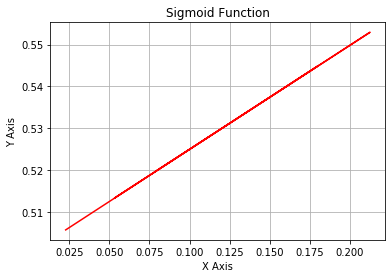

In [42]:
pylab.plot(x, sigmoid(x), 'r')
pylab.grid()
pylab.title('Sigmoid Function')
pylab.xlabel('X Axis')
pylab.ylabel('Y Axis')